In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [2]:
music = pd.read_csv("machinelearning_music.csv")
music

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00,0.531,Electronic
1,1,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.99,0.333,Electronic
2,2,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.01,0.270,Electronic
3,3,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.04,0.323,Electronic
4,5,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,150.00,0.230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,45056,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.99,0.629,Hip-Hop
40556,45057,72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04,0.113,Hip-Hop
40557,45058,51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.08,0.395,Hip-Hop
40558,45059,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.89,0.354,Hip-Hop


# 4) Machine Learnning

We will use 2 predictive models to discover possible patterns in our dataset and make predictions based on them.

#### 4a) Encode categorical data

Most Machine Learning algorithms cannot work with strings; they expect to see numerical values in each feature. It is preferable to one-hot encode categorical features (those having string values), i.e., to expand number of features so that values for each class are placed in a separate column. Where the sample correspond to the given class, it gets 1 in the respective feature; all others get zeroes. Instead, categorical values in this exercise are encoded with LabelEncoder(). It assigns a number (integer) to each class. Thus, 5 distinctive classes in a categorical variable will get values between 0 and 4. It should be noted here that LabelEncoder() memorizes the classes. Therefore, an encoder is instantiated for each categorical variable. The labels (i.e., the music genre) are not encoded, which will make interpretation easier and more understandable. Tree-based algorithms accept string labels.

In [3]:
# Importing libraries
from sklearn.preprocessing import LabelEncoder

Encoding key feature

In [4]:
key_encoder = LabelEncoder()
music["key"] = key_encoder.fit_transform(music["key"])
music.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0,31.0,0.01270,0.622,218293.0,0.890,0.950000,5,0.124,-7.043,Minor,0.0300,115.00,0.531,Electronic
1,1,28.0,0.00306,0.620,215613.0,0.755,0.011800,11,0.534,-4.617,Major,0.0345,127.99,0.333,Electronic
2,2,34.0,0.02540,0.774,166875.0,0.700,0.002530,4,0.157,-4.498,Major,0.2390,128.01,0.270,Electronic
3,3,32.0,0.00465,0.638,222369.0,0.587,0.909000,9,0.157,-6.266,Major,0.0413,145.04,0.323,Electronic
4,5,46.0,0.02890,0.572,214408.0,0.803,0.000008,2,0.106,-4.294,Major,0.3510,150.00,0.230,Electronic


In [5]:
# Printing out corresponding classes
key_encoder.classes_

array(['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
      dtype=object)

Encoding mode feature

In [6]:
mode_encoder = LabelEncoder()
music["mode"] = mode_encoder.fit_transform(music["mode"])
music.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0,31.0,0.01270,0.622,218293.0,0.890,0.950000,5,0.124,-7.043,1,0.0300,115.00,0.531,Electronic
1,1,28.0,0.00306,0.620,215613.0,0.755,0.011800,11,0.534,-4.617,0,0.0345,127.99,0.333,Electronic
2,2,34.0,0.02540,0.774,166875.0,0.700,0.002530,4,0.157,-4.498,0,0.2390,128.01,0.270,Electronic
3,3,32.0,0.00465,0.638,222369.0,0.587,0.909000,9,0.157,-6.266,0,0.0413,145.04,0.323,Electronic
4,5,46.0,0.02890,0.572,214408.0,0.803,0.000008,2,0.106,-4.294,0,0.3510,150.00,0.230,Electronic


In [7]:
# Printing out corresponding classes

mode_encoder.classes_

array(['Major', 'Minor'], dtype=object)

#### 4b) Exploration and Visualization

Perform basic statistical exploration and visualization on the Train Set.

We will start by setting up a Multi-Variate Classification problem.

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(music["music_genre"])
predictors = ["popularity","acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","valence"]
X = pd.DataFrame(music[predictors]) 

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (30420, 1) (30420, 13)
Test Set  : (10140, 1) (10140, 13)


In [10]:
# Summary Statistics for Response
y_train["music_genre"].value_counts()

Alternative    3074
Jazz           3064
Hip-Hop        3052
Anime          3048
Classical      3047
Blues          3035
Rock           3029
Electronic     3029
Country        3026
Rap            3016
Name: music_genre, dtype: int64

In [11]:
# Summary Statistics for Predictors
X_train.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,30420.000000,30420.000000,30420.000000,3.042000e+04,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000
mean,44.233169,0.306690,0.558745,2.457834e+05,0.598838,0.181406,5.353978,0.193891,-9.150383,0.360224,0.093885,119.797564,0.456476
std,15.502503,0.341113,0.178891,1.118389e+05,0.264904,0.324999,3.463828,0.161658,6.176533,0.480073,0.101895,30.620665,0.247152
min,0.000000,0.000000,0.059600,1.550900e+04,0.000792,0.000000,0.000000,0.009670,-47.046000,0.000000,0.022400,34.350000,0.000000
25%,34.000000,0.020500,0.443000,1.907175e+05,0.432000,0.000000,3.000000,0.096900,-10.867500,0.000000,0.036000,94.857500,0.257000
50%,45.000000,0.146000,0.569000,2.275870e+05,0.642000,0.000158,5.000000,0.126000,-7.280500,0.000000,0.048900,119.690000,0.448000
75%,56.000000,0.546000,0.687000,2.761610e+05,0.815000,0.155250,8.000000,0.244000,-5.181000,1.000000,0.098800,140.150000,0.647000
max,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,11.000000,1.000000,1.949000,1.000000,0.939000,220.280000,0.992000


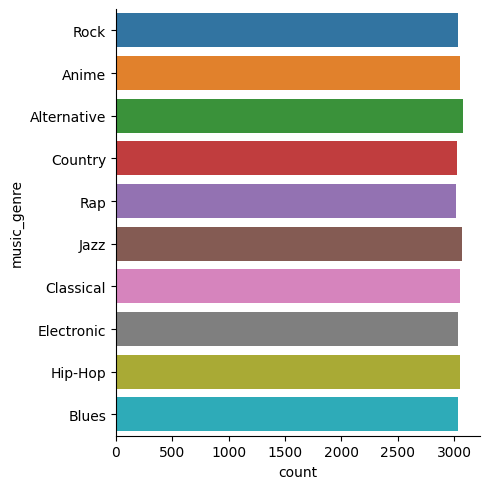

In [12]:
# Draw the distribution of Response
sns.catplot(y = "music_genre", data = y_train, kind = "count")

## 4c) Classification Tree

In [13]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
y_predict = dectree.fit(X_train,y_train).predict(X_test)

[Text(0.5, 0.875, 'popularity <= 47.5\ngini = 0.9\nsamples = 30420\nvalue = [3074, 3048, 3035, 3047, 3026, 3029, 3052, 3064, 3016\n3029]\nclass = Classical'),
 Text(0.25, 0.625, 'loudness <= -16.991\ngini = 0.852\nsamples = 16798\nvalue = [1218, 2986, 2741, 2871, 1859, 2530, 129, 2398, 28\n38]\nclass = Jazz'),
 Text(0.125, 0.375, 'danceability <= 0.491\ngini = 0.409\nsamples = 2918\nvalue = [6, 307, 86, 2205, 18, 37, 2, 256, 0, 1]\nclass = Rock'),
 Text(0.0625, 0.125, 'gini = 0.29\nsamples = 2456\nvalue = [2, 216, 28, 2053, 7, 14, 0, 135, 0, 1]\nclass = Rock'),
 Text(0.1875, 0.125, 'gini = 0.765\nsamples = 462\nvalue = [4, 91, 58, 152, 11, 23, 2, 121, 0, 0]\nclass = Rock'),
 Text(0.375, 0.375, 'popularity <= 25.5\ngini = 0.842\nsamples = 13880\nvalue = [1212, 2679, 2655, 666, 1841, 2493, 127, 2142, 28, 37]\nclass = Jazz'),
 Text(0.3125, 0.125, 'gini = 0.518\nsamples = 2325\nvalue = [11, 1560, 336, 120, 33, 197, 5, 54, 2, 7]\nclass = Jazz'),
 Text(0.4375, 0.125, 'gini = 0.841\nsamples =

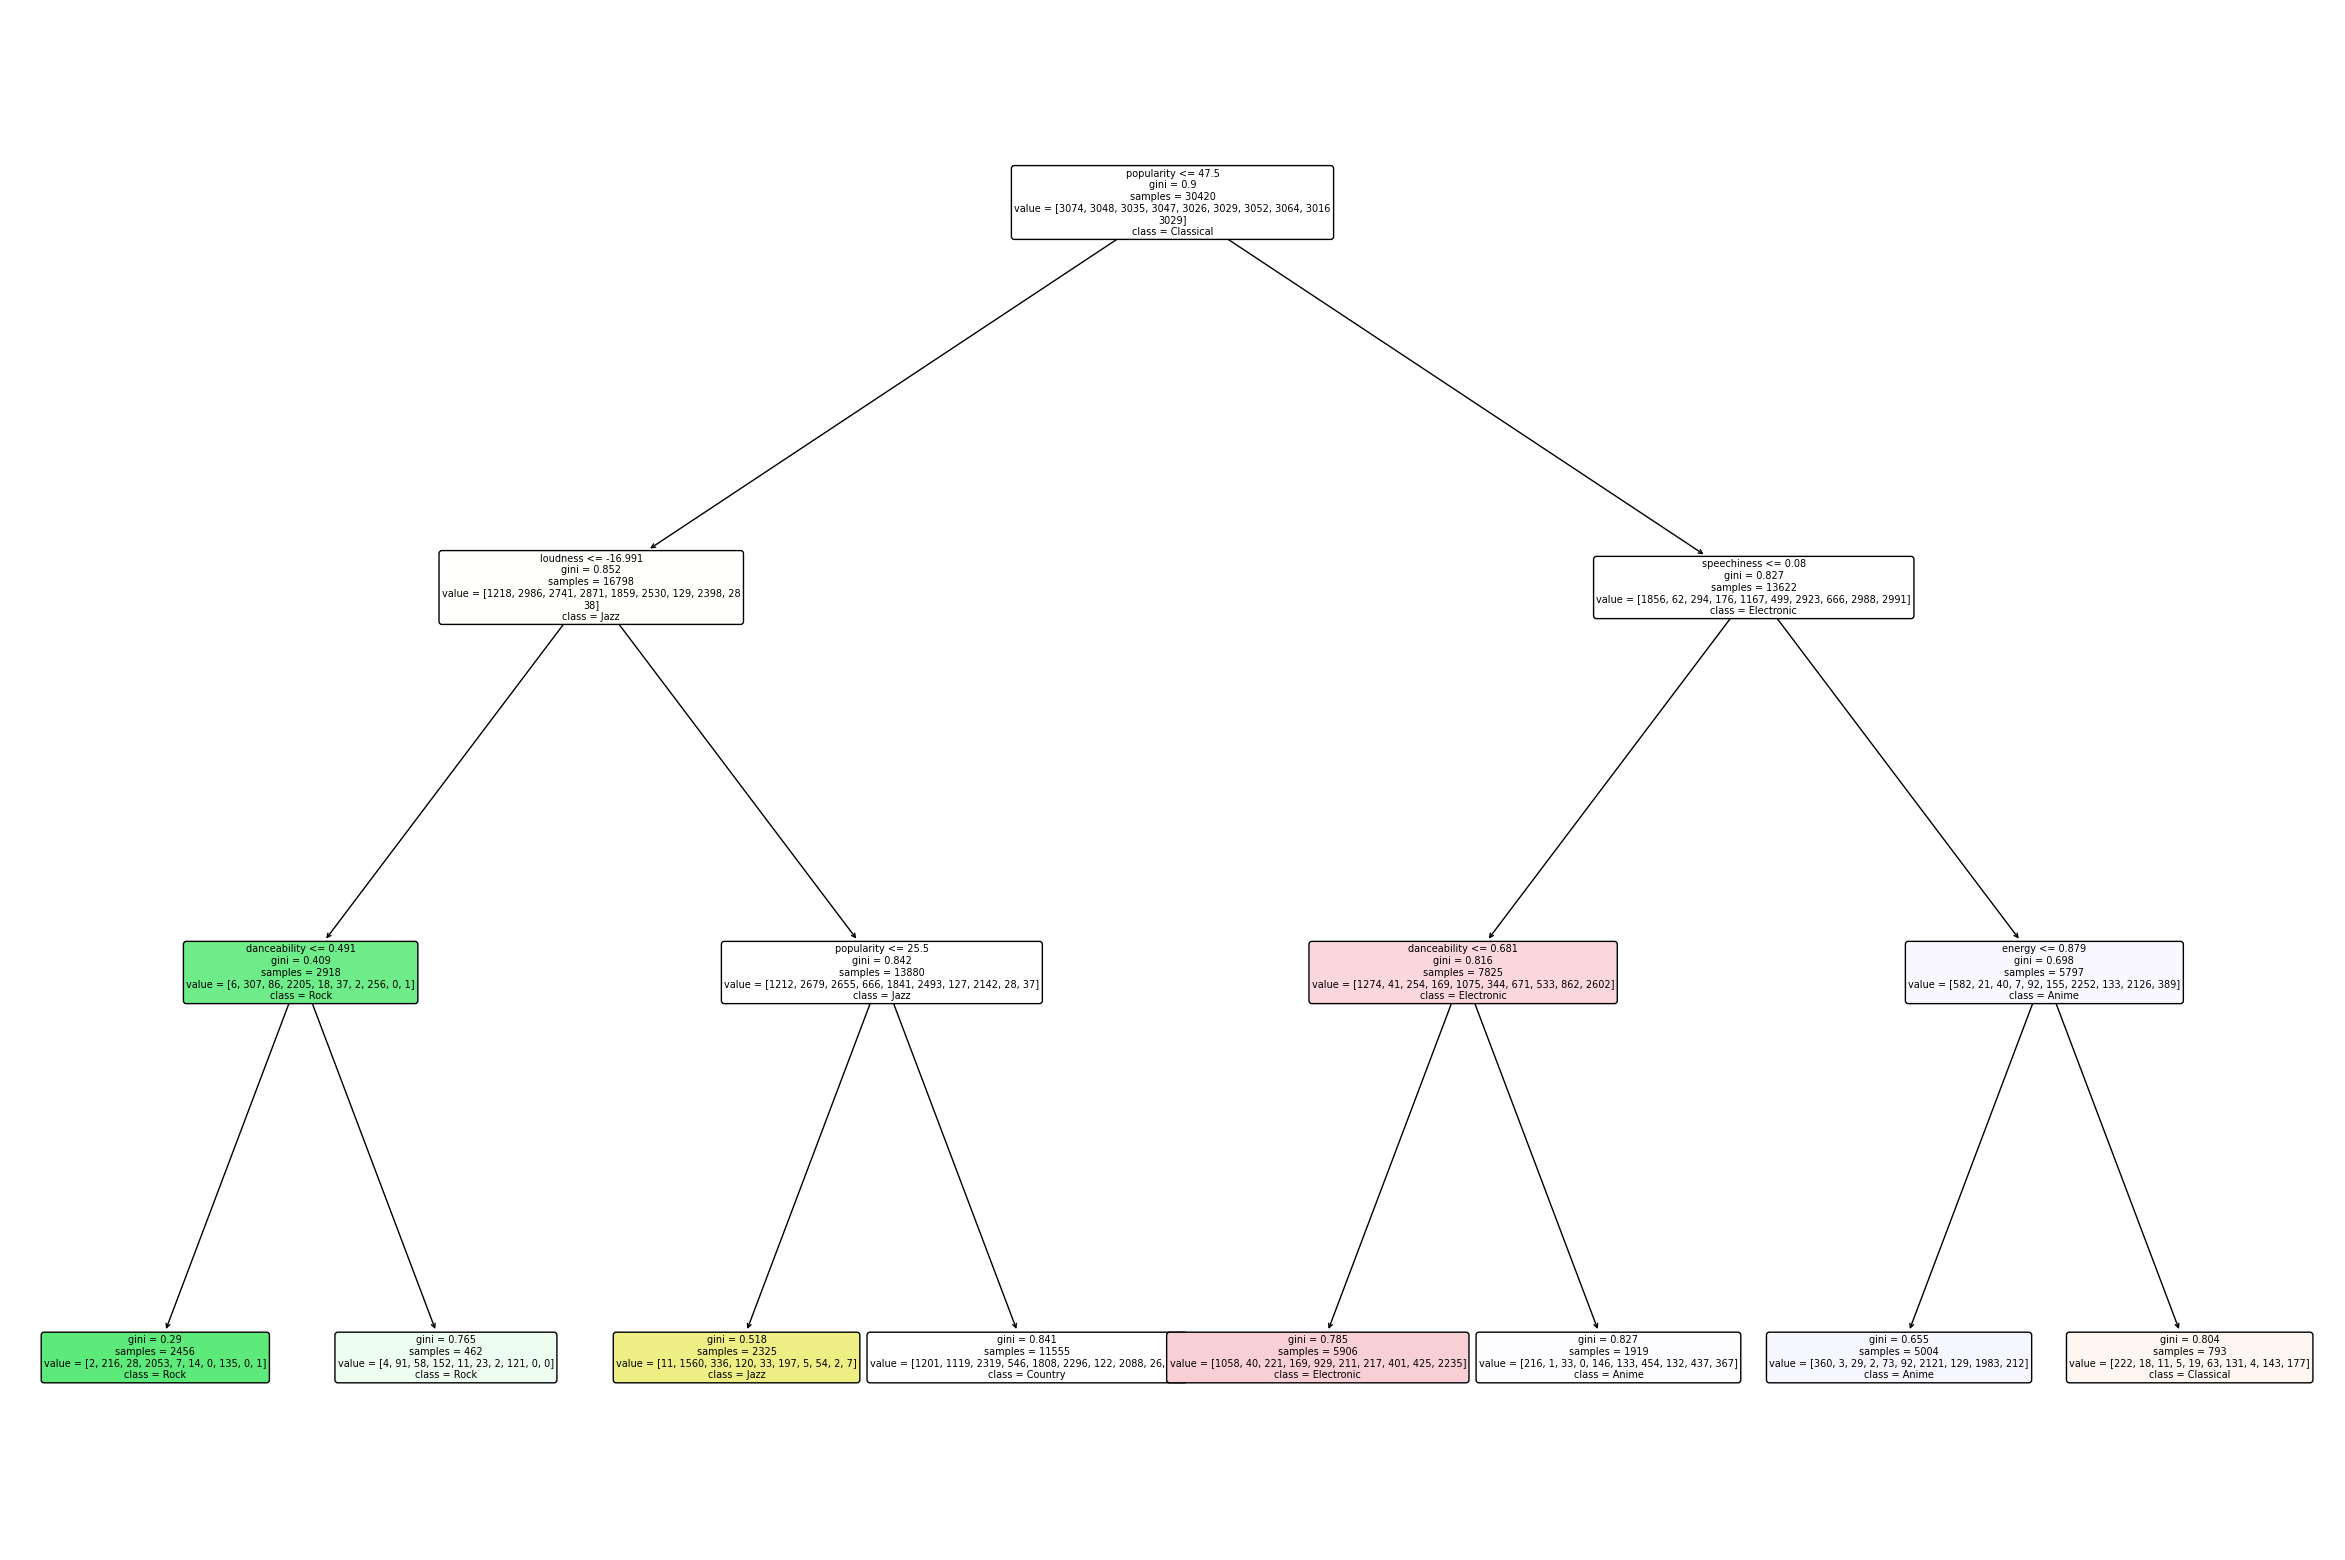

In [14]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,20))
plot_tree(dectree, filled=True, rounded=True, fontsize = 7, 
          feature_names= X_train.columns, 
          class_names= ["Classical","Jazz","Country","Rock","Hip-Hop","Rap","Anime","Alternative","Blues","Electronic"])

## 4d) Confusion Matrix

#### We start by Finding Optimal Depth via K-fold Cross-Validation
We use a range of tree depths to evaluate and to plot the estimated performance +/- 2 standard deviations for each depth using K-fold cross validation. We provide a Python code that can be used in any situation, where you want to tune your decision tree given a predictor tensor X and labels Y. The code includes the training set performance in the plot, while scaling the y-axis to focus on the cross-validation performance.

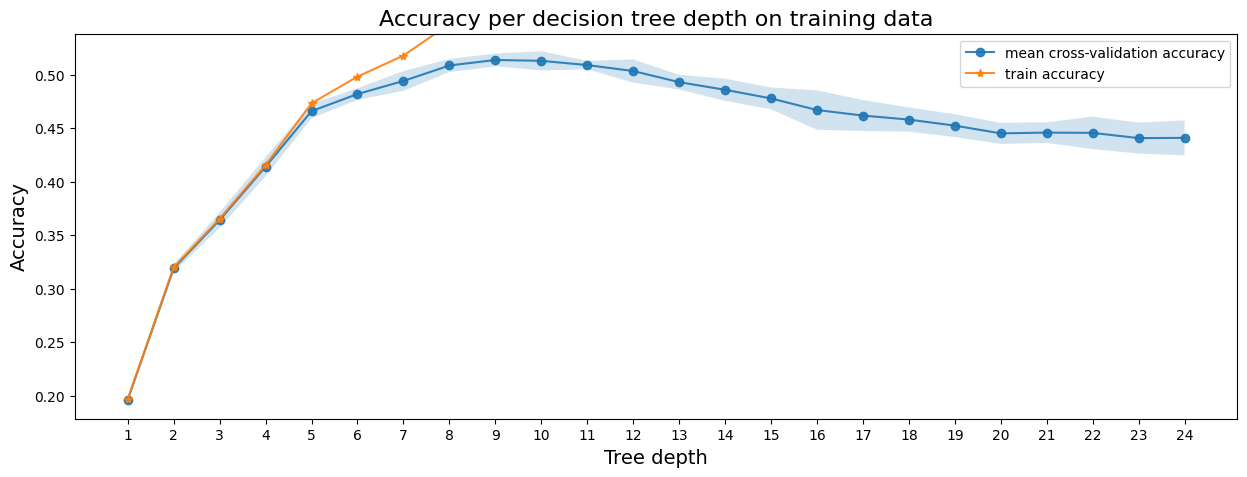

In [15]:
# Import essential models and functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [16]:
#printing out the optimum depth

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-9 tree achieves the best mean cross-validation accuracy 51.39053 +/- 0.29887% on training dataset


The method selects tree depth 10 because it achieves the best average accuracy on training data using cross-validation folds with size 5. The lower bound of the confidence interval of the accuracy is high enough to make this value significant. When more nodes are added to the tree, it is clear that the cross-validation accuracy changes towards zero.

#### Now we print the confusion matrix

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6051610782380014

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5161735700197239



<AxesSubplot: >

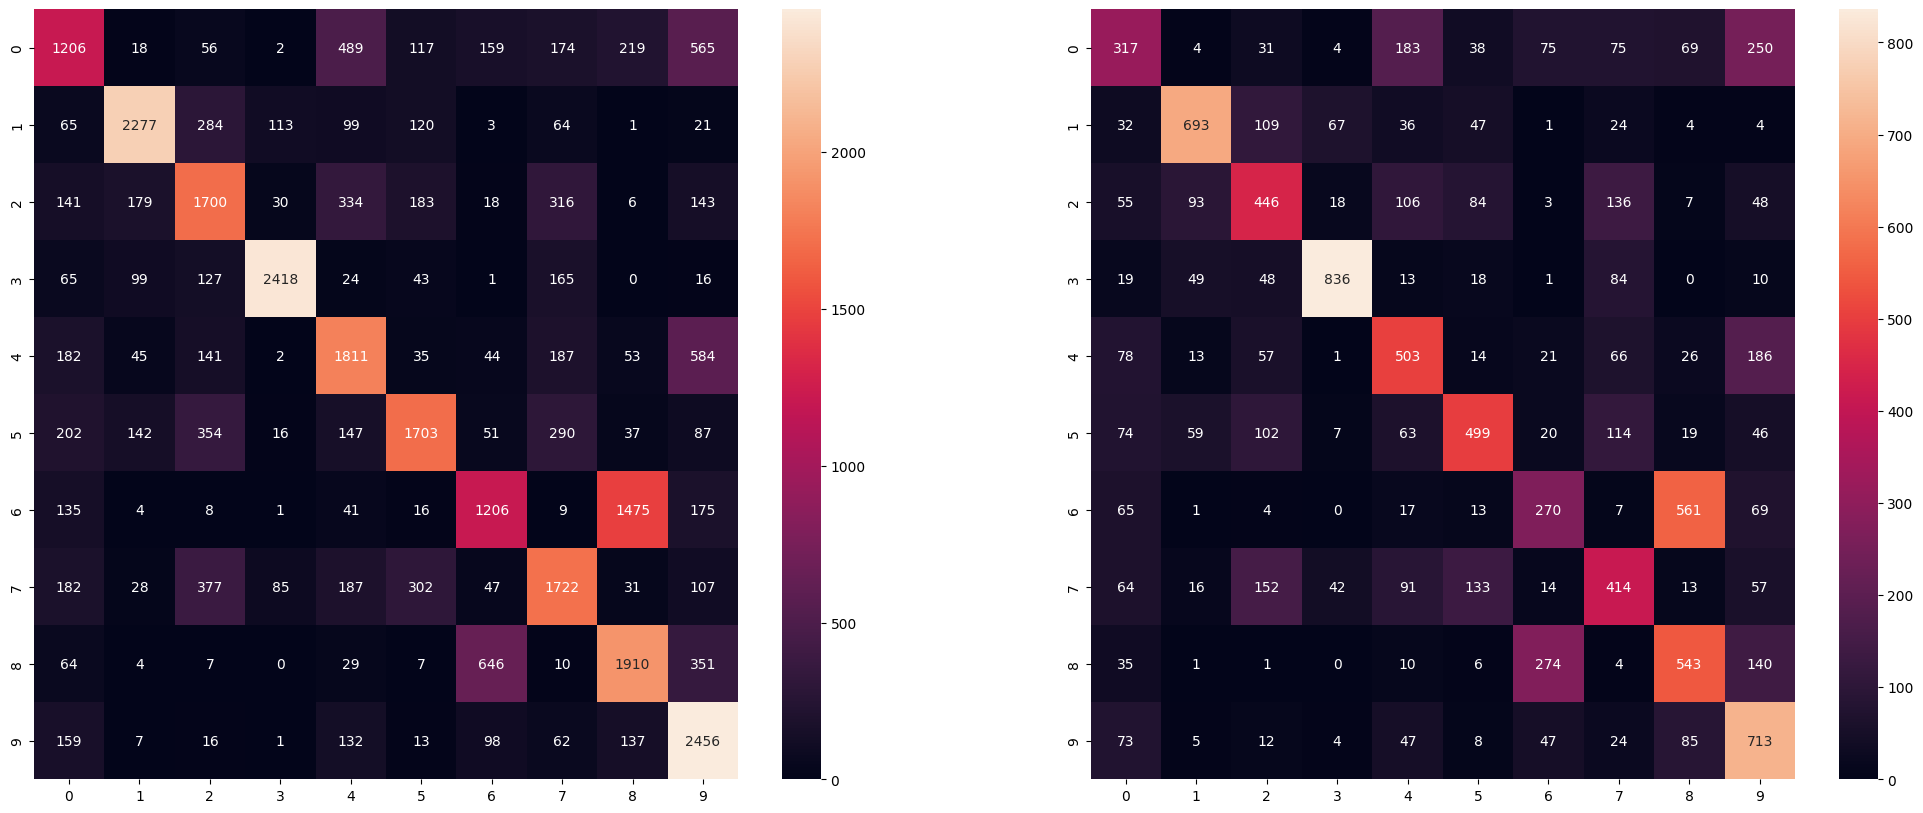

In [17]:
# Extract Response and Predictors
y = pd.DataFrame(music['music_genre'])
X = pd.DataFrame(music[predictors])
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[1])

In the above confusion matrix, 0-9 are the indexes for ["Classical","Jazz","Country","Rock","Hip-Hop","Rap","Anime","Alternative","Blues","Electronic"] respectively

The "Goodness of Fit" refers to the performance of the model, which has been evaluated using the accuracy metric. The accuracy metric measures the proportion of correctly classified instances out of all instances.

In this case, the model was trained on a training dataset and tested on a separate testing dataset. The classification accuracy for the training dataset was found to be 0.601, which means that the model correctly classified 60.1% of the instances in the training dataset. The classification accuracy for the testing dataset was found to be 0.512, which means that the model correctly classified 51.2% of the instances in the testing dataset.

This shows that the decision tree may be an optimal model for predicting song genres

# 4.2a) Basic exploration

Second modeling: Random Forest classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
rf = RandomForestClassifier(random_state=50)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=50)

<AxesSubplot: >

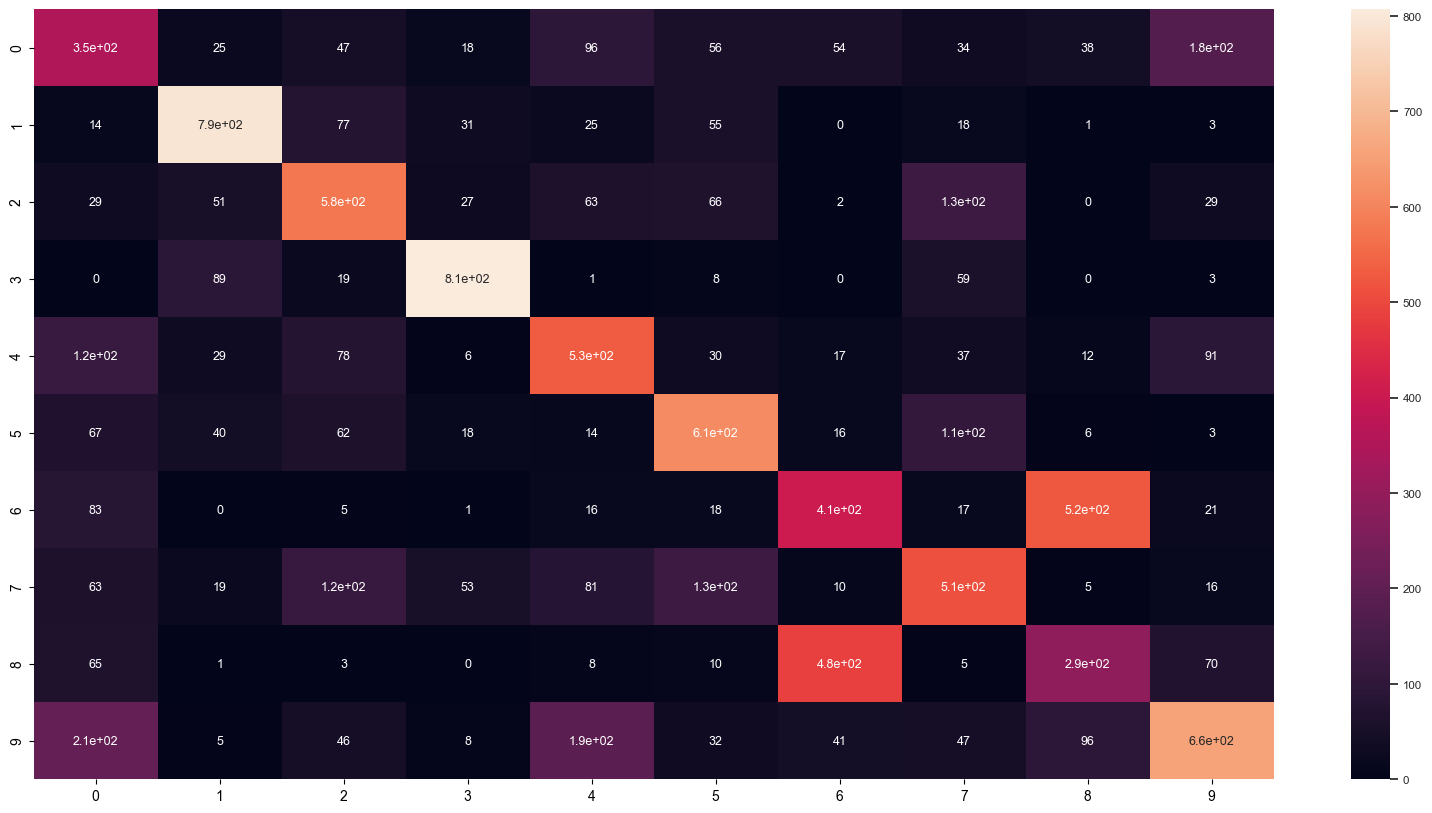

In [20]:
y_pred = rf.predict(X_test)
fig, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=.75)
cnf1 = confusion_matrix(y_pred,y_test)
sns.heatmap(cnf1,annot=True)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5462524654832347


In [22]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    
}

In [23]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_cv = GridSearchCV(estimator= rf, param_grid=grid, cv= 5)
rf_cv.fit(X_train,y_train.values.ravel())

In [ ]:
rf_cv.best_params_
print("Heello")

In [ ]:
rf2 = RandomForestClassifier(n_estimators = 200, max_depth = 7, max_features = 'sqrt',random_state = 18, criterion = 'gini').fit(X_train, y_train)

In [ ]:
prediction = rf2.predict(X_test)
confusion_matrix(y_test,prediction)

In [ ]:
accuracy_score(y_test,prediction)
print("Accuracy:", accuracy_score)